<a href="https://colab.research.google.com/github/Mobashera-Alam/CS-5783-MachineLearning/blob/main/Assignment1/Problem3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries

import numpy as np

import math

import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
x_train = np.load('/content/drive/My Drive/ML/Assignment_1/x_train.npy',encoding ='bytes')
y_train =  np.load('/content/drive/My Drive/ML/Assignment_1/y_train.npy',encoding='bytes')
x_test =  np.load('/content/drive/My Drive/ML/Assignment_1/x_test.npy',encoding='bytes')
y_test =  np.load('/content/drive/My Drive/ML/Assignment_1/y_test.npy',encoding='bytes')

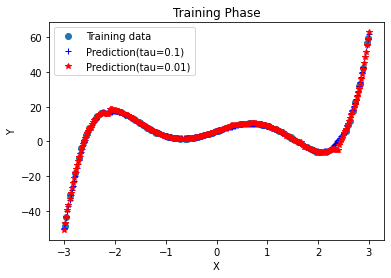

In [10]:
# function to perform locally weighted linear regression
def local_weighted_regression(x0, X, Y, tau):
    # fit model: normal equations with kernel
    x0 = np.r_[1, x0]
    X = np.c_[np.ones(len(X)), X]
    xw = X.T * weights_calculate(x0, X, tau)
    theta = np.linalg.pinv(xw @ X) @ xw @ Y
    # "@" is used to
    # predict value
    return x0 @ theta
 
# function to perform weight calculation
def weights_calculate(x0, X, tau):
    return np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * (tau **2) ))
# plot locally weighted regression for different bandwidth values
def plot_lwr(tau):
    # prediction
    domain = np.linspace(-3, 3, num=300)
    prediction = [local_weighted_regression(x0, X, Y, tau) for x0 in domain]
    
    plot1 = plt.plot(X, Y,'o', label='Training data' )
    plot2 = plt.plot(domain, prediction,'+', color= 'blue',label= 'Prediction(tau=0.1)')
    return plot1, plot2
def plot_lwr1(tau):
    # prediction
    domain = np.linspace(-3, 3, num=300)
    prediction = [local_weighted_regression(x0, X, Y, tau) for x0 in domain]
    
    #plot1 = plt.plot(X, Y,'o', label='Training data' )
    plot2 = plt.plot(domain, prediction,'*',color='red', label= 'Prediction(tau=0.01)')
    return  plot2
#define distribution
n = 1000
x0 = np.linspace(-3,3,300)
X = x_train
Y = y_train
plot_lwr(0.1)
plot_lwr1(0.01)
plt.title('Training Phase')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
#plt.plot(x_test, y_test,'o')
#plt.plot(x_test, y_pred, '+')

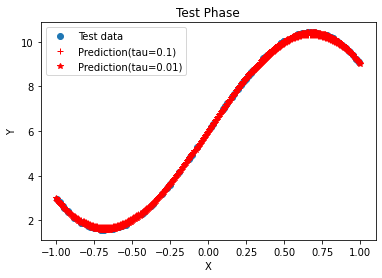

In [12]:
# function to perform locally weighted linear regression
def local_weighted_regression(x0, X, Y, tau):
    x0 = np.r_[1, x0]
    X = np.c_[np.ones(len(X)), X]
    xw = X.T * weights_calculate(x0, X, tau)
    theta = np.linalg.pinv(xw @ X) @ xw @ Y
    # "@" is used to
    # predict value
    return x0 @ theta
 
# function to perform weight calculation
def weights_calculate(x0, X, tau):
    return np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * (tau **2) ))
# plot locally weighted regression for different bandwidth values
def plot_lwr(tau):
    # prediction
    domain = np.linspace(-1, 1, num=300)
    prediction = [local_weighted_regression(x0, X, Y, tau) for x0 in domain]
    plot1 = plt.plot(X, Y,'o' , label='Test data')
    plot2 = plt.plot(domain, prediction,'+', color='red', label = 'Prediction(tau=0.1)')
    return plot1, plot2
def plot_lwr1(tau):
    # prediction
    domain = np.linspace(-1, 1, num=300)
    prediction = [local_weighted_regression(x0, X, Y, tau) for x0 in domain]
    
    #plot1 = plt.plot(X, Y,'o', label='Training data' )
    plot2 = plt.plot(domain, prediction,'*',color='red', label= 'Prediction(tau=0.01)')
    return  plot2
#define distribution
n = 20
x0 = np.linspace(-1, 1, num=n)
X = x_test
Y = y_test
plot_lwr(0.1)
plot_lwr1(0.01)
plt.title('Test Phase')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

1.No,we donot need basis function using locally weighted approach. 
2. This method doesnot require training rather it is an instantaneous process based on previous data it predicts the desired point. It keeps updating the parameters based on the future data. So it requires all previous data everytime it predicts some test data. For linear regression we can use basis function where we can update the values once we trained up our model(doesnot require these data for future prediction) 